# Employee Attrition Study

Employee attrition is a serious problem for a company, maintining its top talents can lead to a great reduction in costs.

Given that the employee's productivity tends to diminish when they decide to leave the company and given that there's an overhead cost in replacing an employee and giving him the propper formation and time to adjust to the new position, it's safe to say that this is a costly event. Granted not all attritions are bad, some employees are just disrupting, but in general maintining the maximum number of employees as possible is a sound strategy, as described here, here and here

With this context in mind we'll try to create a model to predict who's about to leave the company so we could report it to HR and they can decid to do something about it. This is a fictional data set created by IBM data scientists.


The data contains the following columns:

- Age
- Attrition
- BusinessTravel
- DailyRate
- Department
- DistanceFromHome
- Education
- EducationField
- EmployeeCount
- EmployeeNumber
- EnvironmentSatisfaction
- Gender
- HourlyRate
- JobInvolvement
- JobLevel
- JobRole
- JobSatisfaction
- MaritalStatus
- MonthlyIncome
- MonthlyRate
- NumCompaniesWorked
- Over18
- OverTime
- PercentSalaryHike
- PerformanceRating
- RelationshipSatisfaction
- StandardHours 
- StockOptionLevel
- TotalWorkingYears
- TrainingTimesLastYear
- WorkLifeBalance
- YearsAtCompany
- YearsInCurrentRole
- YearsSinceLastPromotion
- YearsWithCurrManager

**There are some category column:**

- Education: 1 'Below College', 2 'College', 3 'Bachelor', 4 'Master', 5 'Doctor'

- EnvironmentSatisfaction: 1 'Low', 2 'Medium', 3 'High', 4 'Very High'

- JobInvolvement: 1 'Low', 2 'Medium', 3 'High', 4 'Very High'

- JobSatisfaction: 1 'Low', 2 'Medium', 3 'High', 4 'Very High'

- PerformanceRating: 1 'Low', 2 'Good', 3 'Excellent', 4 'Outstanding'

- RelationshipSatisfaction: 1 'Low', 2 'Medium', 3 'High', 4 'Very High'

- WorkLifeBalance: 1 'Bad', 2 'Good', 3 'Better', 4 'Best'

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Get the Data

In [4]:
df = pd.read_csv('IBM.csv')

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
df.shape

(1470, 35)

**We got our dataset loaded, let's do a quick check to see how many missing values we're dealing with**

In [96]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

**It seems to be no missing values, which is perfect! we'll go ahead and get familiarized with the dataset**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [8]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [11]:
df.nunique().sort_values()

Over18                         1
StandardHours                  1
EmployeeCount                  1
Gender                         2
Attrition                      2
PerformanceRating              2
OverTime                       2
MaritalStatus                  3
Department                     3
BusinessTravel                 3
StockOptionLevel               4
EnvironmentSatisfaction        4
JobInvolvement                 4
JobSatisfaction                4
RelationshipSatisfaction       4
WorkLifeBalance                4
Education                      5
JobLevel                       5
EducationField                 6
TrainingTimesLastYear          7
JobRole                        9
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate

## Exploratory Data Analysis


Let's begin some exploratory data analysis!

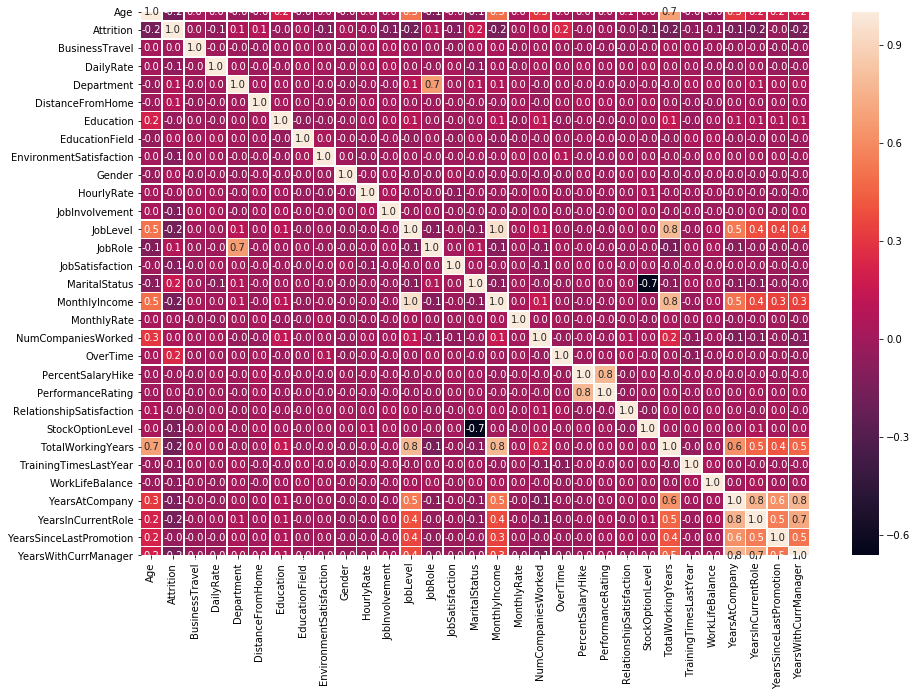

In [95]:
f,ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Text(0.5, 1.0, 'Attrition')

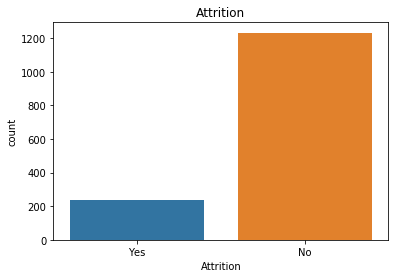

In [14]:
sns.countplot(df['Attrition'])
plt.title('Attrition')

**Whats the age distribution on each group?**

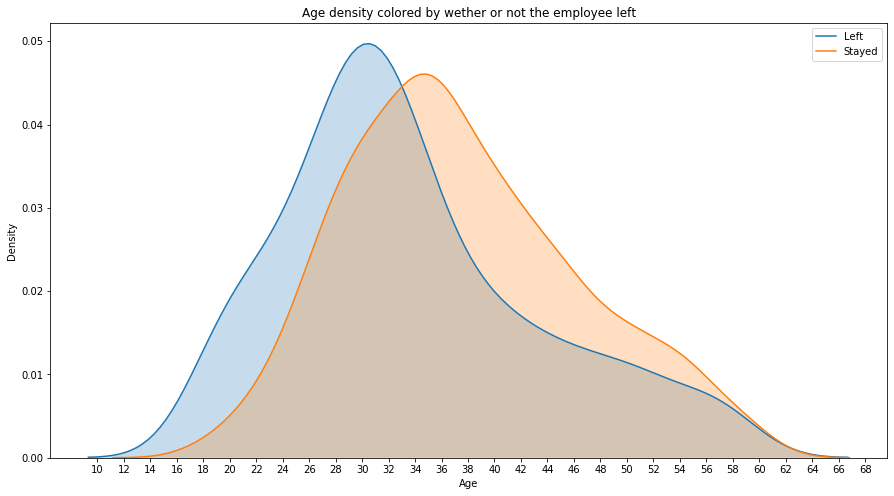

In [57]:
f,ax = plt.subplots(figsize=(15,8))
sns.kdeplot(df.loc[df.Attrition == "Yes", "Age"], shade = True, label = "Left")
sns.kdeplot(df.loc[df.Attrition == "No", "Age"], shade = True, label = "Stayed")
ax.set(xlabel = "Age", ylabel = "Density",title = "Age density colored by wether or not the employee left")
ax.set_xticks(range(10, 70, 2))
plt.show()

**Number of Employee by Age**

Text(0.5, 1.0, 'Age')

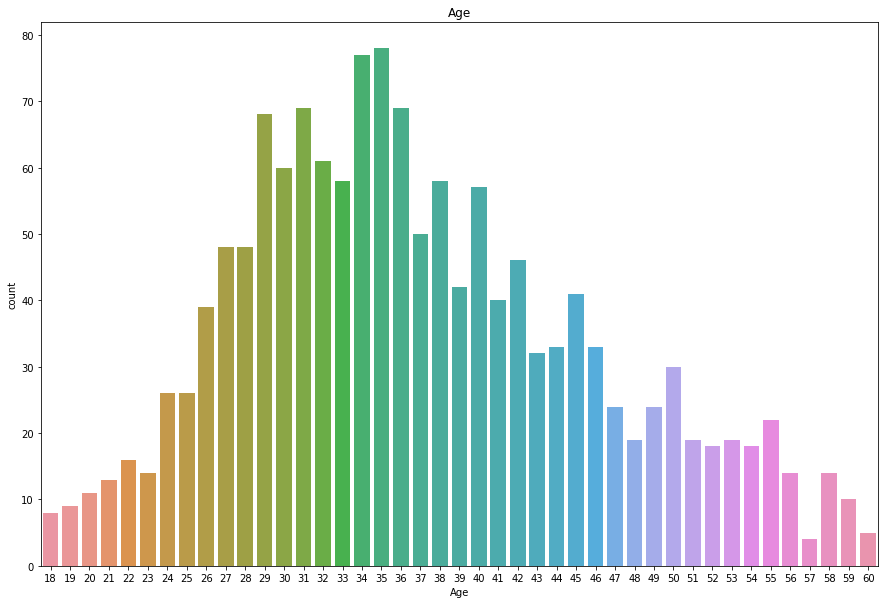

In [58]:
plt.figure(figsize=(15,10))
sns.countplot(df['Age'])
plt.title('Age')

**Which gender is more likely to leave?**

Text(0.5, 1.0, 'OverTime')

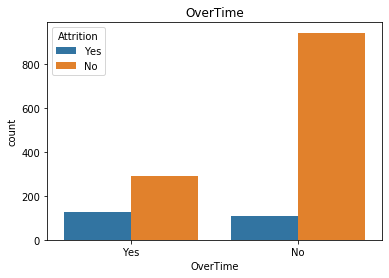

In [34]:
sns.countplot(df['OverTime'], hue=df['Attrition'])
plt.title('OverTime')

**Check People Marital Status**

Text(0.5, 1.0, 'Marital Status')

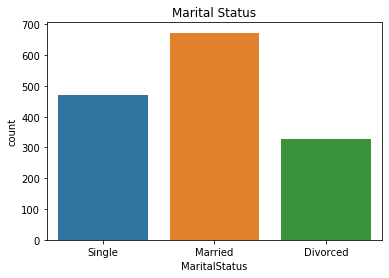

In [22]:
sns.countplot(df['MaritalStatus'])
plt.title('Marital Status')

**Number of Job Role**

Text(0.5, 1.0, 'Job Role')

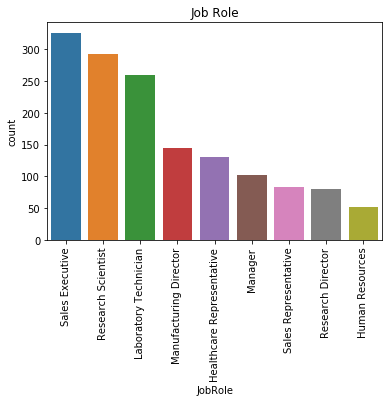

In [24]:
sns.countplot(df['JobRole'])
plt.xticks(rotation='vertical')
plt.title('Job Role')

**Which gender is more likely to leave?**

Text(0.5, 1.0, 'Gender')

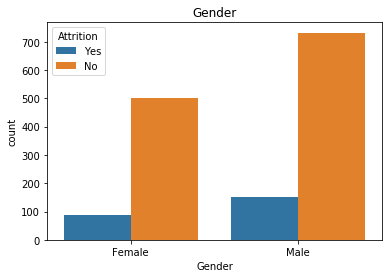

In [33]:
sns.countplot(df['Gender'], hue=df['Attrition'])
plt.title('Gender')

**Which Education Field is more likely to leave?**

Text(0.5, 1.0, 'Education Field')

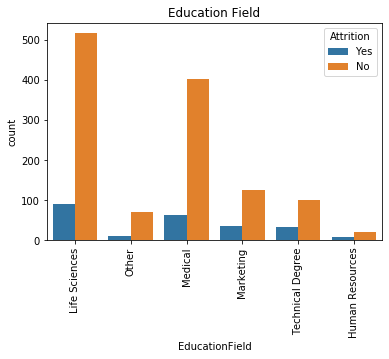

In [32]:
sns.countplot(df['EducationField'], hue=df['Attrition'])
plt.xticks(rotation='vertical')
plt.title('Education Field')

**Which eEpartment is more likely to leave?**

Text(0.5, 1.0, 'eEpartment')

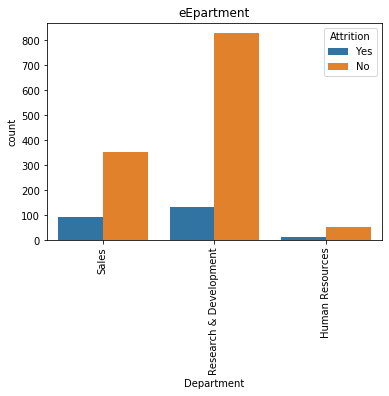

In [31]:
sns.countplot(df['Department'], hue=df['Attrition'])
plt.xticks(rotation='vertical')
plt.title('eEpartment')

Text(0.5, 1.0, 'Job Level')

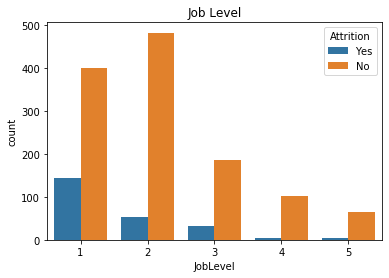

In [59]:
sns.countplot(df['JobLevel'], hue=df['Attrition'])
plt.title('Job Level')

Text(0.5, 1.0, 'Job Satisfaction')

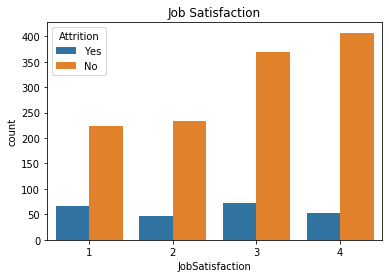

In [60]:
sns.countplot(df['JobSatisfaction'], hue=df['Attrition'])
plt.title('Job Satisfaction')

Text(0.5, 1.0, 'Business travel')

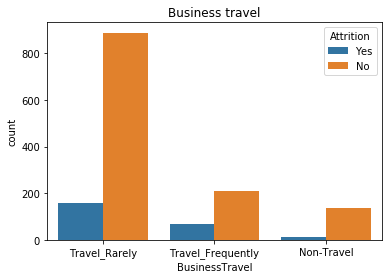

In [37]:
sns.countplot(df['BusinessTravel'], hue=df['Attrition'])
plt.title('Business travel')

**Observation of above Count Plot Graph**

High attrition rate in given attribute

- Single attrition rate is 50% in marital status.
- Job Level 2 attrition rate is also high comapre to other job levels
- Education Field - Life Science has high attrition rate.
- Attrition raltes are high in these attribute Sales Deparment, Male, Job satisfaction 

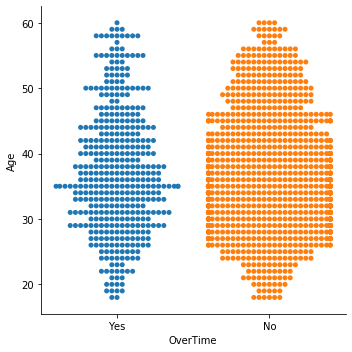

In [39]:
sns.catplot(x="OverTime", y="Age", kind="swarm", data=df);

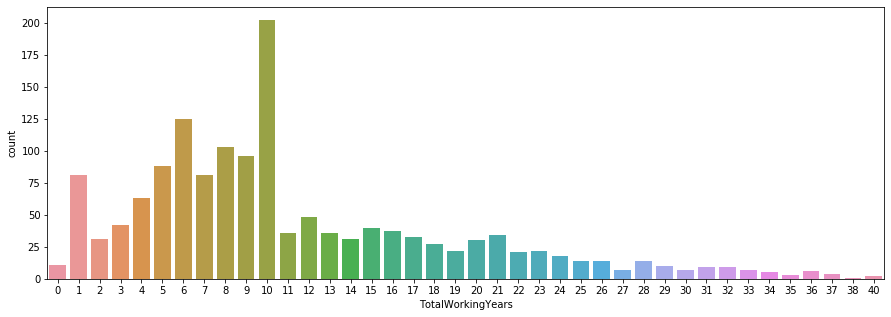

In [40]:
plt.subplots(figsize=(15,5))
sns.countplot(df.TotalWorkingYears)

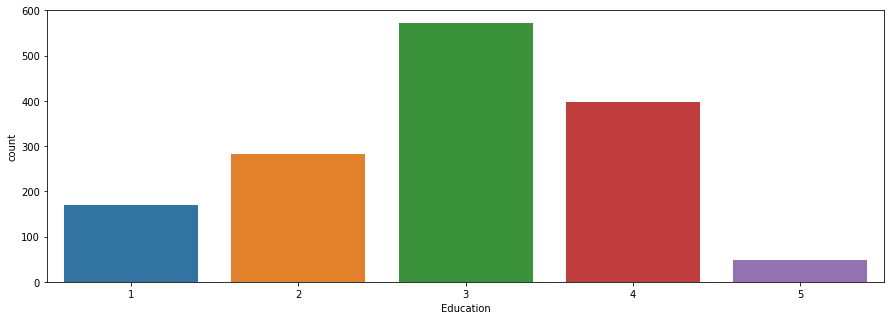

In [41]:
plt.subplots(figsize=(15,5))
sns.countplot(df.Education)

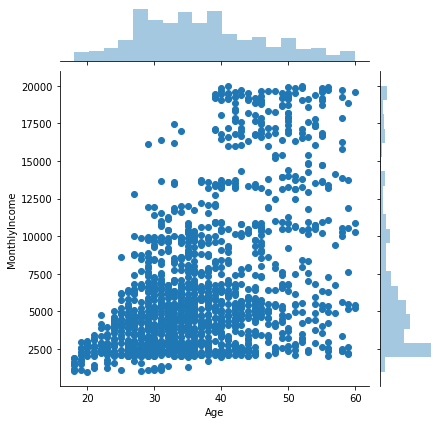

In [43]:
sns.jointplot(x='Age', y='MonthlyIncome', data=df)

Text(0.5, 1.0, 'Monthly Income According to Age')

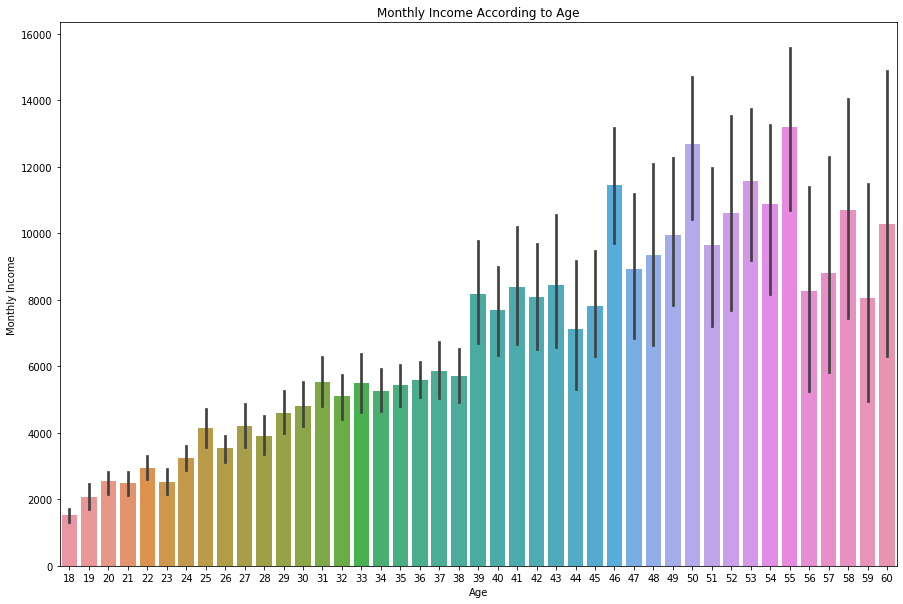

In [50]:
plt.figure(figsize=(15,10))
sns.barplot(x='Age', y='MonthlyIncome', data=df)
plt.xlabel("Age")
plt.ylabel("Monthly Income")
plt.title("Monthly Income According to Age")

Text(0.5, 1.0, 'Monthly Income According to Age')

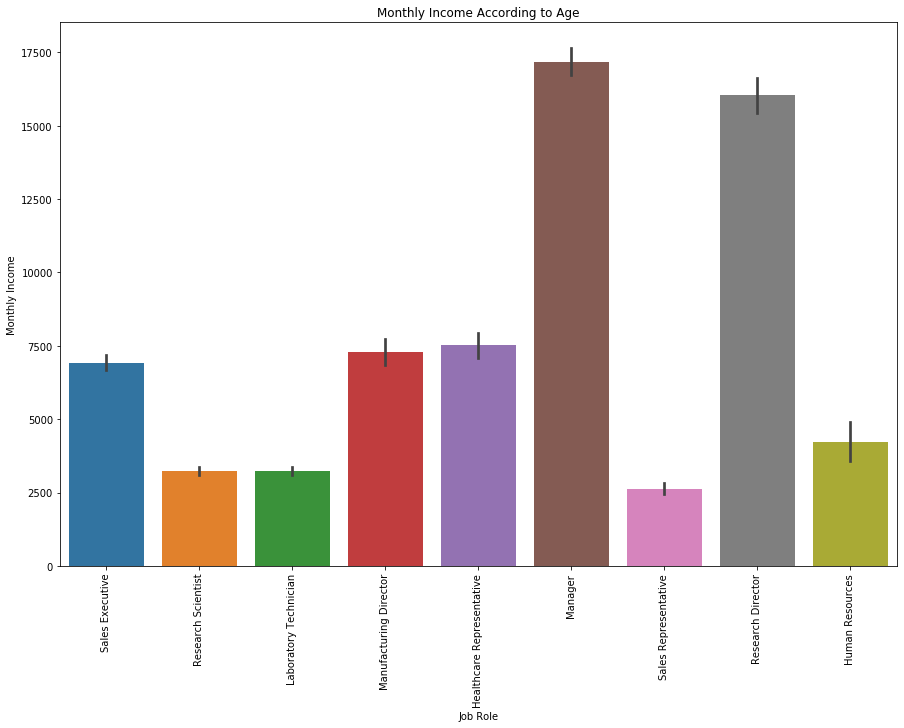

In [53]:
plt.figure(figsize=(15,10))
sns.barplot(x='JobRole', y='MonthlyIncome', data=df)
plt.xticks(rotation='vertical')
plt.xlabel("Job Role")
plt.ylabel("Monthly Income")
plt.title("Monthly Income According to Age")

## Feature Selection

**I removed some features that I felt were unnecessary from the original IBM**

In [62]:
df.drop(["EmployeeNumber", "EmployeeCount", "Over18", "StandardHours"], axis = 1, inplace = True)

In [63]:
df.shape

(1470, 31)

**If any of the types are objects, then this needs to be changed to integers**

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
MonthlyRate                 1470 non-null int64
NumCompaniesWorked    

## This allows any columns to be changed with the corresponding values.

In [66]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender','JobRole','MaritalStatus', 'OverTime']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

**Compare the data at the beginning to now, ensuring no string value remains.**

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null int32
BusinessTravel              1470 non-null int32
DailyRate                   1470 non-null int64
Department                  1470 non-null int32
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null int32
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null int32
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null int32
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null int32
MonthlyIncome               1470 non-null int64
MonthlyRate                 1470 non-null int64
NumCompaniesWorked          1

In [68]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


In [69]:
from sklearn.preprocessing import MinMaxScaler

In [71]:
scaler = MinMaxScaler()

main = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

main.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.547619,1.0,1.0,0.715820,1.0,0.000000,0.25,0.2,0.333333,0.0,...,0.0,0.000000,0.000000,0.200,0.0,0.000000,0.15,0.222222,0.000000,0.294118
1,0.738095,0.0,0.5,0.126700,0.5,0.250000,0.00,0.2,0.666667,1.0,...,1.0,1.000000,0.333333,0.250,0.5,0.666667,0.25,0.388889,0.066667,0.411765
2,0.452381,1.0,1.0,0.909807,0.5,0.035714,0.25,0.8,1.000000,1.0,...,0.0,0.333333,0.000000,0.175,0.5,0.666667,0.00,0.000000,0.000000,0.000000
3,0.357143,0.0,0.5,0.923407,0.5,0.071429,0.75,0.2,1.000000,0.0,...,0.0,0.666667,0.000000,0.200,0.5,0.666667,0.20,0.388889,0.200000,0.000000
4,0.214286,0.0,1.0,0.350036,0.5,0.035714,0.00,0.6,0.000000,1.0,...,0.0,1.000000,0.333333,0.150,0.5,0.666667,0.05,0.111111,0.133333,0.117647


In [75]:
main.shape

(1470, 31)

MinMaxScaler makes sure that every feature values ranges from 0 to 1 so that there's no discrepancy in the different feature scales, this scaler does not, however, handle outliers so that might be something we should watch out for and maybe correct with a different scaler, but I don't think it'll be worth the hassle

Now that we have our features cleaned up we can perform our feature selection test

## Train Test Split

We will predict Attrition

In [78]:
X = main.drop(["Attrition"], axis = 1)

y = main.Attrition

In [76]:
from sklearn.feature_selection import SelectKBest, f_classif

In [79]:
selector = SelectKBest(f_classif, k = 10)

# fit our selector to the data
X = pd.DataFrame(selector.fit_transform(X, y), index = X.index, columns = X.columns[selector.get_support(indices = True)])

# see what are the top selected features from our univariate filter
X.columns

Index(['Age', 'JobLevel', 'MaritalStatus', 'MonthlyIncome', 'OverTime',
       'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsWithCurrManager'],
      dtype='object')

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Using KNN

Remember that we are trying to come up with a model to predict whether someone will Predclass or not. We'll start with k=1.

In [82]:
from sklearn.neighbors import KNeighborsClassifier

In [83]:
knn = KNeighborsClassifier(n_neighbors=1)

In [84]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [85]:
pred = knn.predict(X_test)

## Predictions and Evaluations


Let's evaluate our KNN model!

In [86]:
from sklearn.metrics import classification_report,confusion_matrix

In [87]:
print(confusion_matrix(y_test,pred))

[[325  41]
 [ 55  20]]


In [88]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.86      0.89      0.87       366
         1.0       0.33      0.27      0.29        75

    accuracy                           0.78       441
   macro avg       0.59      0.58      0.58       441
weighted avg       0.77      0.78      0.77       441



## Choosing a K Value


Let's go ahead and use the elbow method to pick a good K Value:

In [89]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

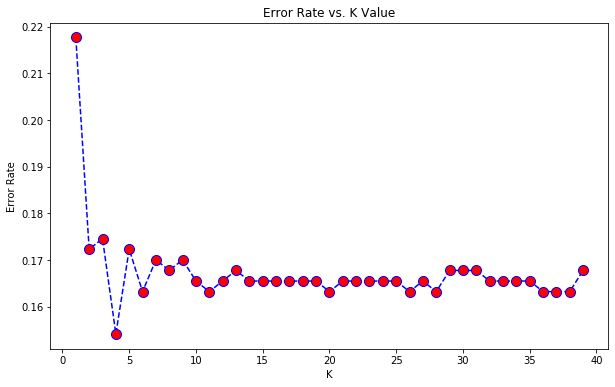

In [90]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that after around K>6 the error rate just tends to hover around 0.16 - 0.17, Let's retrain the model with that and check the classification report!

In [91]:
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=6')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=6


[[356  10]
 [ 62  13]]


              precision    recall  f1-score   support

         0.0       0.85      0.97      0.91       366
         1.0       0.57      0.17      0.27        75

    accuracy                           0.84       441
   macro avg       0.71      0.57      0.59       441
weighted avg       0.80      0.84      0.80       441



In [92]:
knn.score(X_train,y_train)

0.8736637512147716

In [93]:
knn.score(X_test,y_test)

0.8367346938775511

**What makes the employees leave?**

It's good to be able to save the company money by predicting who's going to leave and who's not, but the ideal situation is to inform the company what's the most critical features that make our model think that a person is going to leave.

To do that we'll dive a bit into machine learning explainability. We'll do this in three steps:

- Find out what are the features that the model payed close attetion to, using permutation feature importance

- From certain features let's check how is the model affect as they vary, using partial dependence plots

- Let's look at some people and see how did their features contribute to the decision of the model, using local permutation feature importance

In [104]:
from eli5.sklearn import PermutationImportance
import eli5

**What are the most relevant features for our model?**

To find this out we're going to be using permutation feature importance. This tecnhique is used after the model is trained and the idea is that we ask: if I randomly shuffle a column of my validation data, how would that affect the accuracy of my model?

In [105]:
perm = PermutationImportance(knn, random_state=1).fit(X_test, y_test)

eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0127 ± 0.0153,OverTime
0.0095 ± 0.0073,YearsAtCompany
0.0077 ± 0.0117,MonthlyIncome
0.0073 ± 0.0105,YearsWithCurrManager
0.0063 ± 0.0175,TotalWorkingYears
0.0059 ± 0.0159,Age
0.0059 ± 0.0084,YearsInCurrentRole
0.0045 ± 0.0118,JobLevel
0.0014 ± 0.0159,MaritalStatus
-0.0045 ± 0.0099,StockOptionLevel


**The results are:**

- Overtime seems to be the most key factor for determining if a employee is likely to leave or not
- A person being single comes next
- Then comes the Age of the person followed by the number of years with their current manager as well as how much they're paid

So we can kind of have a feel of the type of person that leaves. Probably a young, single person who puts in alot of overtime, they may leave because they're the most attractive persons for other companies to employ them, or it might be because they're feeling unappreciated.